## 전국 신규 민간 아파트 분양가격
* 2015년 10월부터 2018년 7월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* 아파트 분양가에 대한 분석보다는 데이터 분석 방법 탐구 목적
* Pandas를 활용


In [1]:
!pip show plotnine

Name: plotnine
Version: 0.5.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\anaconda3\lib\site-packages
Requires: patsy, numpy, matplotlib, mizani, statsmodels, pandas, descartes, scipy
Required-by: 


In [2]:
!pip show missingno

Name: missingno
Version: 0.4.1
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: c:\anaconda3\lib\site-packages
Requires: numpy, seaborn, scipy, matplotlib
Required-by: 


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import re
from plotnine import *

 % 를 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용할 수 있음. 경로를 불러오는 문제가 있을 시 사용하면 유용함.

In [5]:
# 현재 위치 정보
%pwd

'c:\\BigData\\Kaggle'

In [6]:
pre_sale = pd.read_csv("C://BigData/Kaggle/apt_price/pre_sale_2018.7.csv", encoding='euc-kr') #encoding 필요
pre_sale.shape

(2890, 5)

In [7]:
pre_sale.head()


,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [9]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [10]:
# 분양가격이 숫자타입이 아니라서 숫자타입으로 변경해줄 필요가 있음.
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [11]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

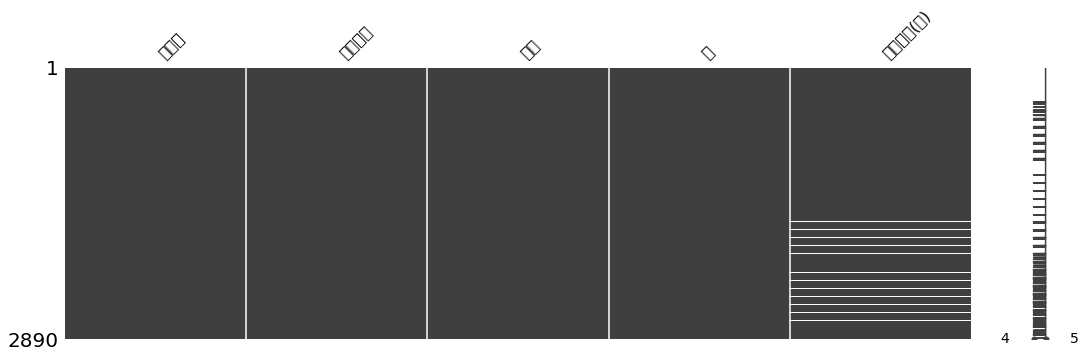

In [12]:
#결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,5))

In [13]:
#연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [14]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [15]:
#분양가격의 타입을 숫자로 변경해 준다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [16]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [17]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [18]:
pre_sale.isnull().sum() #분양가격에 결측치가 많이 존재

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [19]:
pre_sale.describe()   #pre_sale.describe?

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [20]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,경남,전용면적 60㎡초과 85㎡이하,2017,12,2221
freq,170,578,1020,255,17


In [21]:
#2017년 데이터만 따로 찾음
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [22]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어있는 것을 확인 가능
pre_sale['규모구분'].value_counts()

전용면적 60㎡초과 85㎡이하     578
전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡이하           578
전용면적 102㎡초과          578
전체                   578
Name: 규모구분, dtype: int64

In [23]:
pre_sale['지역명'].value_counts()

경남    170
충북    170
경북    170
강원    170
전북    170
세종    170
충남    170
경기    170
대전    170
인천    170
전남    170
대구    170
울산    170
제주    170
부산    170
서울    170
광주    170
Name: 지역명, dtype: int64

## 전국평균 분양가격

 * groupby 와 pivot_table 활용하기

In [24]:
# pre_sale.groupby?

In [26]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

##  규모별 전국 평균 분양가격

In [27]:
#pre_sale.pivot_table?

In [29]:
pre_sale.pivot_table('평당분양가격','규모구분','연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


## 전국 분양가변동금액
 규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴본다.

In [30]:
# 규모구분에서 전체로 되어 있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분']=='전체']
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [34]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액']) * 1000
min_delta_price = np.min(region_year['변동액']) * 1000
mean_delta_price = np.mean(region_year['변동액']) * 1000

print('2015년부터 2018년까지 분양가는 계속 상승했고, 상승액이 가장 큰 지역은 제주, 상승액은 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며, 평당 {:,.0f}원이다.'. format(min_delta_price))
print('그러나 결측치가 많아 변동액이 가장 작다고 판단 어려움')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했고, 상승액이 가장 큰 지역은 제주, 상승액은 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며, 평당 369,000원이다.
그러나 결측치가 많아 변동액이 가장 작다고 판단 어려움
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


 * 21개월간의 전국 신규 민간 아파트 분양가격 동향파일을 요약해 봄
 * Pandas를 통해 데이터를 가져오고 요약, 피벗테이블, groupby를 사용하면서 요약해보기도 함

# 시각화

 * 데이터를 시각화 해보기에 앞서 앤스콤의 4인방을 해보기로 함
 * 아래 4개의 그래프는 다른데이터로 그려졌음
 * 또 이 4개의 데이터는 평균, 표준편차, 상관계수가 같다. 하지만 시각화 했을 때 전혀 다른 데이터임을 확인할 수 있음.
 * 이앤스콤의 4인방은 요약된 데이터만으로 데이터를 판단할 수 없다는 것을 보여줌
 * [Anscombe quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
      ![Image of Anscombe](./img/anscombe.jpg)

## `A Grammer of Graphics for Python - plotnine`
 * [tutorial](https://plotnine.readthedocs.io/en/stable/)

### 연도별 변동 그래프
 * 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
 * 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요함
 * 폰트는 각자의 환경에 맞는 폰트를 가져와서 실행함
 * 한글폰트를 지정해주지 않는다면 글자가 깨짐